## Disfrutad :)

In [1]:
#Hacer modelo predictivo H2o, indica cual es el mejor modelo. 

In [2]:
#elastic utilizar este modelo 

In [3]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RFR 

In [4]:
salarios=pd.read_csv('../salaries_data.csv')
salarios

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,US,100,US,M
496,2021,EN,FT,Big Data Engineer,5882,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,82528,GB,100,GB,L


In [5]:
test=pd.read_csv('../test.csv')
test

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L
...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,US,100,US,M
103,2022,SE,FT,Data Architect,US,100,US,M
104,2022,SE,FT,Data Scientist,US,100,US,M
105,2022,EN,FT,Data Analyst,CA,0,CA,M


In [6]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary_in_usd       500 non-null    int64 
 5   employee_residence  500 non-null    object
 6   remote_ratio        500 non-null    int64 
 7   company_location    500 non-null    object
 8   company_size        500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           107 non-null    int64 
 1   experience_level    107 non-null    object
 2   employment_type     107 non-null    object
 3   job_title           107 non-null    object
 4   employee_residence  107 non-null    object
 5   remote_ratio        107 non-null    int64 
 6   company_location    107 non-null    object
 7   company_size        107 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.8+ KB


In [8]:
data = pd.concat([salarios, test], axis=0)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Data Architect,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


<AxesSubplot:>

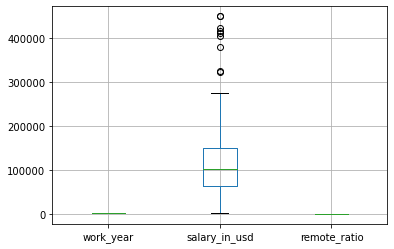

In [9]:
data.boxplot()

In [10]:
data.salary_in_usd.max()

450000.0

In [11]:
data1= list(data[data.salary_in_usd >= 280000].index)
data.drop(data1, axis=0, inplace=True)

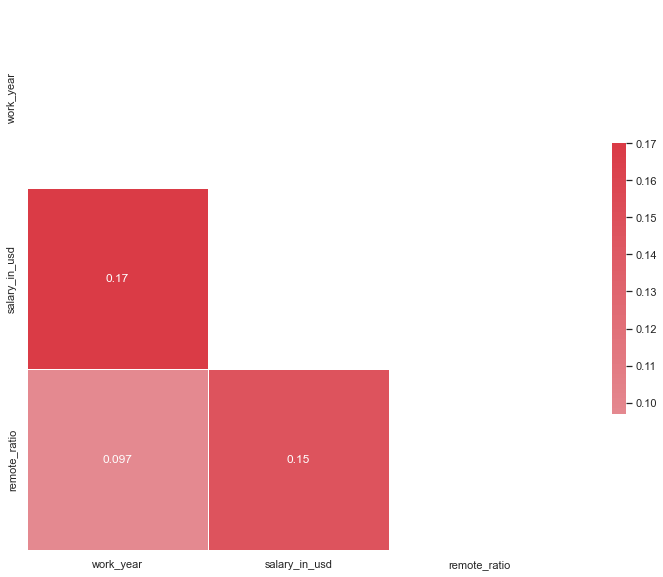

In [12]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(salarios.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(salarios.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [13]:
data.work_year.value_counts()

2022    314
2021    214
2020     69
Name: work_year, dtype: int64

In [14]:
data=pd.get_dummies(data, columns=['work_year'])   

In [15]:
#data = data.drop('work_year', axis=1)

In [16]:
data.experience_level.value_counts()

SE    276
MI    210
EN     88
EX     23
Name: experience_level, dtype: int64

In [17]:
categoria={'SE': 10, 'MI': 4, 'EN': 6, 'EX': 40} 

def cambio_categoria(x):   
    return jornada[x]    

data.experience_level=data.experience_level.apply(lambda x: categoria[x])

data.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2020,work_year_2021,work_year_2022
0,10,FT,Data Engineer,140250.0,US,100,US,M,0,0,1
1,10,FT,Data Engineer,135000.0,US,100,US,M,0,0,1
2,4,FT,BI Data Analyst,100000.0,US,100,US,M,0,1,0
3,4,CT,ML Engineer,270000.0,US,100,US,L,0,1,0
4,4,FT,Data Engineer,26005.0,RO,0,US,L,0,1,0


In [18]:
#data=pd.get_dummies(data, columns=['experience_level'])   

#data.head()

In [19]:
data.employment_type.value_counts()

FT    579
PT     10
CT      4
FL      4
Name: employment_type, dtype: int64

In [20]:
data.employment_type = data.employment_type.replace('CT', 'PT')
data.employment_type = data.employment_type.replace('FL', 'FT')

data=pd.get_dummies(data, columns=['employment_type'])   

data.head()

In [21]:
jornada={'FT': 1, 'PT': 0.50,} 


def cambio_jornada(x):   
    return jornada[x]    

data.employment_type=data.employment_type.apply(lambda x: jornada[x])

data.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_year_2020,work_year_2021,work_year_2022
0,10,1.0,Data Engineer,140250.0,US,100,US,M,0,0,1
1,10,1.0,Data Engineer,135000.0,US,100,US,M,0,0,1
2,4,1.0,BI Data Analyst,100000.0,US,100,US,M,0,1,0
3,4,0.5,ML Engineer,270000.0,US,100,US,L,0,1,0
4,4,1.0,Data Engineer,26005.0,RO,0,US,L,0,1,0


In [22]:
data.job_title

0        Data Engineer
1        Data Engineer
2      BI Data Analyst
3          ML Engineer
4        Data Engineer
            ...       
102       Data Analyst
103     Data Architect
104     Data Scientist
105       Data Analyst
106       Data Analyst
Name: job_title, Length: 597, dtype: object

In [23]:
data.job_title = ["Data Engineer" if "Engineer" in word else word for word in data.job_title]
data.job_title = ["Data Scientist" if "Scientist" in word else word for word in data.job_title]
data.job_title = ["Data Analyst" if "Analyst" in word else word for word in data.job_title]
data.job_title = ["Data Architect" if "Architect" in word else word for word in data.job_title]
data.job_title = ["Machine Learning Scientist" if "Machine Learning Scientist" in word else word for word in data.job_title]
data.job_title = ["Big Data" if "Big Data" in word else word for word in data.job_title]
data.job_title = ["Machine Learning Engineer" if "Machine Learning Engineer" in word else word for word in data.job_title]

top7 = list(data.job_title.value_counts().index[:9])
data.loc[-data.job_title.isin(top7), ['job_title']] = 'Other'
data.job_title.value_counts()

Data Engineer               228
Data Scientist              189
Data Analyst                118
Other                        13
Data Architect               12
Data Science Manager         12
Data Analytics Manager        7
Data Science Consultant       7
Director of Data Science      6
Head of Data                  5
Name: job_title, dtype: int64

In [24]:
len(data.job_title.value_counts())

10

In [25]:
data=pd.get_dummies(data, columns=['job_title'])   

In [26]:
#from sklearn.preprocessing import LabelEncoder

#data.job_title=LabelEncoder().fit_transform(data.job_title)

#data.head()

In [27]:
data.salary_in_usd.value_counts()

100000.0    12
150000.0    10
200000.0     9
120000.0     9
135000.0     9
            ..
54000.0      1
230000.0     1
173762.0     1
91237.0      1
90700.0      1
Name: salary_in_usd, Length: 304, dtype: int64

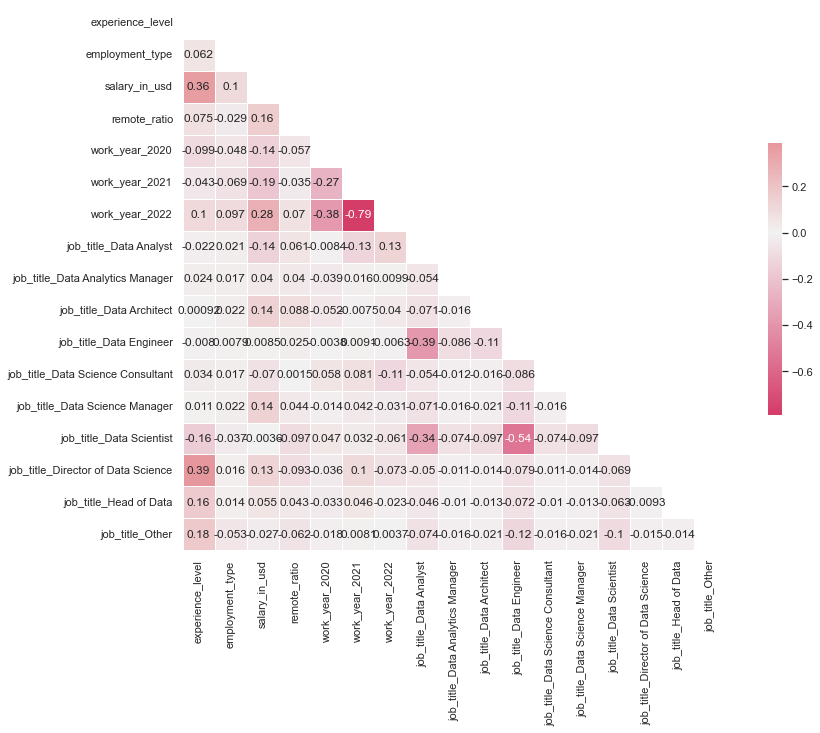

In [28]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [29]:
data.employee_residence

0      US
1      US
2      US
3      US
4      RO
       ..
102    US
103    US
104    US
105    CA
106    US
Name: employee_residence, Length: 597, dtype: object

In [30]:
#data = data.drop('employee_residence', axis=1)

In [31]:
data=pd.get_dummies(data, columns=['employee_residence'])   

In [32]:
data.remote_ratio.value_counts()

100    374
0      125
50      98
Name: remote_ratio, dtype: int64

In [33]:
#remote={100: 2, 0: 0, 50: 2} 


#def cambio_remote(x):   
    #return remote[x]    

#data.remote_ratio=data.remote_ratio.apply(lambda x: remote[x])

In [34]:
#data = data.drop('remote_ratio', axis=1)

In [35]:
#from sklearn.preprocessing import StandardScaler

#scaler=StandardScaler()

#data.remote_ratio=scaler.fit_transform(data.remote_ratio.values.reshape(-1, 1))

In [36]:
data=pd.get_dummies(data, columns=['remote_ratio'])  

In [37]:
data.company_location

0      US
1      US
2      US
3      US
4      US
       ..
102    US
103    US
104    US
105    CA
106    US
Name: company_location, Length: 597, dtype: object

In [38]:
#data = data.drop('company_location', axis=1)

In [39]:
data=pd.get_dummies(data, columns=['company_location'])   

In [40]:
data.company_size.value_counts()

M    323
L    192
S     82
Name: company_size, dtype: int64

In [41]:
#data = data.drop('company_size', axis=1)

In [42]:
data=pd.get_dummies(data, columns=['company_size'])   

In [43]:
#color={'M': 1, 'L': 2, 'S': 0} 

#def cambio_color(x):   
    #return color[x]    

#data.company_size=data.company_size.apply(lambda x: color[x])

In [44]:
#scaler=StandardScaler()

#data.company_size=scaler.fit_transform(data.company_size.values.reshape(-1, 1))

#data.head()

In [45]:
#data = data.drop('employee_residence', axis=1)

In [46]:
data.shape

(597, 129)

In [47]:
salario_lim= data.iloc[:490,:]
salario_lim

,experience_level,employment_type,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,job_title_Data Analyst,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,10,1.0,140250.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,10,1.0,135000.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,4,1.0,100000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,0.5,270000.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,4,1.0,26005.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,10,1.0,144000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
495,10,1.0,100000.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
496,6,1.0,5882.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
497,10,1.0,90700.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
test_lim= data.iloc[490:,:].drop('salary_in_usd', axis=1) 
test_lim

,experience_level,employment_type,work_year_2020,work_year_2021,work_year_2022,job_title_Data Analyst,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Consultant,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
499,6,1.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
0,10,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,4,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,10,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
103,10,1.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
104,10,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
105,6,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
X=salario_lim.drop('salary_in_usd', axis=1)  

y=salario_lim.salary_in_usd 

In [50]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, random_state=42, test_size=0.20)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 128), (98, 128), (392,), (98,))

In [52]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        
from sklearn.linear_model import Ridge        
from sklearn.linear_model import ElasticNet 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR


linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
svr=SVR()
rfr=RFR()
etr=ETR()
gbr=GBR()

In [53]:
linreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
svr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)
gbr.fit(X_train, y_train)

C:\Users\joser\OneDrive\Documentos\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e+10, tolerance: 1.367e+08
  model = cd_fast.enet_coordinate_descent(


GradientBoostingRegressor()

In [54]:
y_pred = elastic.predict(X_test)
R2_test = elastic.score(X_test, y_test)
y_pred = elastic.predict(X_train)
R2_train = elastic.score(X_train, y_train)

In [55]:
R2_train, R2_test

(0.44066347275618056, 0.42205524799220473)

In [56]:
#rf=RFR()   

#rf.fit(X_train, y_train)   

#y_pred=rf.predict(X_test) 

In [57]:
gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test) 

In [58]:
from sklearn.metrics import mean_squared_error as mse

In [59]:
mse(y_test, y_pred, squared=False)

36351.9672669594

In [60]:
y_pred_kag=gbr.predict(test_lim) 
y_pred[:3]

array([170815.58693169,  95142.32862276, 121962.92221471])

In [63]:
index_lst = [i for i in range(107)]
results= pd.DataFrame({"id" : index_lst, "salary_in_usd" : y_pred_kag})
results.to_csv("resultado.csv", index=False)